# Homework 7 - Logistic Regression, SVM, k-means, Gaussian Mixture Model

Make sure you have downloaded:
1. spkies.csv
2. synthetic_spike_labels.csv

## 0 Introduction and Loading of Data:

We revisit the spike data from previous section and homework. You may read those Jupyter notebooks for further introduction. 

Before performing clustering, we reduce the dimension of the data by projecting it to the first 2 principal components, and working in the principal component axes.

Run the following cells to load, visualize, and preprocess the data.

### Load data and visualize first 20 spikes
Store spike data as `X` and synthetically generated spike labels as `y`.
- Since this homework will primarily use sklearn packages, the dimensions of X is (number of samples) by (number of features).

(3298, 70)
(3298, 1)


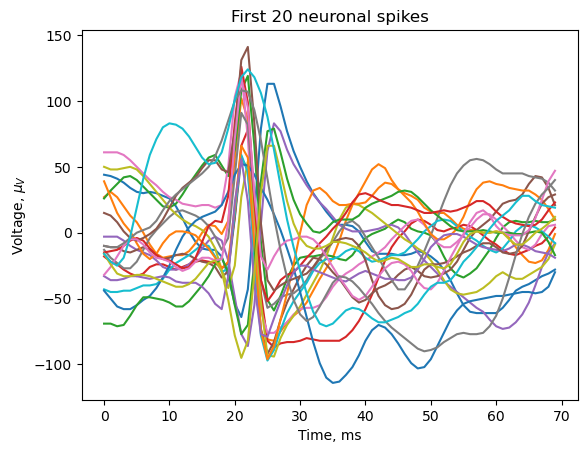

In [1]:
# ------  DO NOT CHANGE CODE IN THIS CELL ------
import numpy as np
import matplotlib.pyplot as plt

# spikes
X = np.loadtxt('spikes.csv', delimiter=',').T
m, n = X.shape
print(X.shape)

# synthetic labels
y = np.loadtxt('synthetic_spike_labels.csv', delimiter=',').reshape(-1,1)
print(y.shape)

# visualize first 20 spikes
for i in range(20):
    plt.plot(np.arange(n),X[i,:])
plt.xlabel(r'Time, ms'); plt.ylabel(r'Voltage, $\mu_V$'); 
plt.title('First 20 neuronal spikes'); plt.show()
# -----------------------------------------------

### Dimensionality Reduction with PCA

PCA has been applied to reduce the data from 70 dimensions to 2 dimensions, by choosing the largest 2 principal components.

(3298, 2)


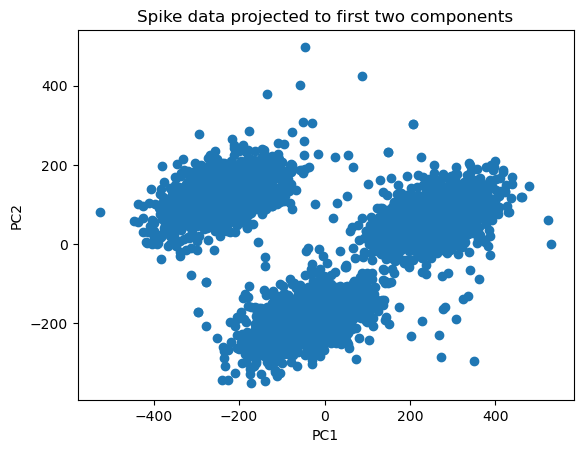

In [2]:
# ------  DO NOT CHANGE CODE IN THIS CELL ------
from sklearn.decomposition import PCA

model = PCA(n_components=2)
X = model.fit_transform(X)
print(X.shape)

plt.scatter(X[:,0], X[:,1])
plt.title('Spike data projected to first two components')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.show()
# -----------------------------------------------

## 1 (Supervised) Logistic Regession
### 1.1 Set up Pipeline and Gridsearch
**Task:**
1. [1 pt] Import `GridSearchCV`, `Pipeline`, and `StandardScaler`.
2. [2 pt] Write a function ```best()```, which 
    - takes as input: 
        - a pipeline object ```pipe```
        - dictionary of parameters ```grid``` to perform a grid search using GridSearchCV to find the optimal hyperparameters.
        - data `X` and `y`
    - returns the best model based on gridsearch
    - Use 3-fold cross-validation and set GridSearchCV scoring to "accuracy".
    - You can adapt it from section notebooks.

In [3]:
# TODO Packages: Grid Search, Pipeline, Scaling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# TODO complete function
def best(pipe, grid, X, y):
    '''
    pipe: pipeline object or sklearn classifier object
    grid: dictionary of parameters to explore. if using pipeline, 
            ensure the double underscore __ convention is used
    X, y: the training data
    '''
    search = GridSearchCV(pipe, grid, scoring = 'accuracy', cv=3)
    search.fit(X, y)
    return search.best_estimator_
    

### 1.2 Build Logistic Regression model
**Task:**
1. [3 pt] Use best() function to find the best logistic regression model, `lr_model`.
    - For the pipeline, include a standard scaler.
    - For the grid, set penalty = ('l2', 'l1'), solver = ['liblinear'], C = [1e-2, 1e-1, 1e0, 1e1, 1e2].
2. [1 pt] Print the best model.

In [18]:
# TODO Logistic Regression with pipeline

from sklearn.linear_model import LogisticRegression

pipe_lr  = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])

lr_grid  = {
    'classifier__penalty': ['l2', 'l1'],
    'classifier__solver': ['liblinear'],
    'classifier__C': [1e-2, 1e-1, 1e0, 1e1, 1e2]
}

lr_model = best(pipe_lr, lr_grid, X, y.ravel())

# print
print(lr_model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(penalty='l1', solver='liblinear'))])


### 1.3 Set up plot function
**Task:**

Complete the function `plot_labels_and_decbdy(label, data, model, modelname)` that displays a scatter plot of data points with their labels and the decision boundary of the model.
- `data` is the coordinate values of the features.
- `label` is a vector of labels for the data.
- `model` is the sklearn model object that you will use to generate the decision boundary.
- `modelname` is a string that will be used for your plot title.
1. [1 pt] Scatter plot of data with their labels.
2. [1 pt] Complete code for the meshgrid.
3. [1 pt] Compute predicted labels `pred` for each point on meshgrid, based on input model.
4. [1 pt] Make an informative title that uses the argument modelname.

In [22]:
def plot_labels_and_decbdy(label, data, model, modelname):
    # TODO scatter plot
    plt.scatter(data[:, 0], data[:, 1], c=label, edgecolors='k')

    
    # TODO complete meshgrid
    x_min, x_max = data[:, 0].min(), data[:, 0].max()
    y_min, y_max = data[:, 1].min(), data[:, 1].max()
    n_dec_bdy = 1000
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_dec_bdy), np.linspace(y_min, y_max, n_dec_bdy))

    # TODO labels for each point in meshgrid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(mesh_data)
    pred = pred.reshape(xx.shape)

    
    

    # Put the result into a color plot
    plt.imshow(pred, interpolation='nearest',
                extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                cmap=plt.cm.Paired,
                aspect='equal', origin='lower', alpha=0.7)

    # TODO Make an informative title that uses the argument modelname
    plt.title(f'Decision Boundary of {modelname} Iris Dataset')
    #plt.colorbar(label='Predicted Label')
    plt.xlabel('PC1'); 
    plt.ylabel('PC2'); 
    plt.show()

### 1.4 Plot
**Task:**
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their true labels, and the decision boundary of the logistic regression model.

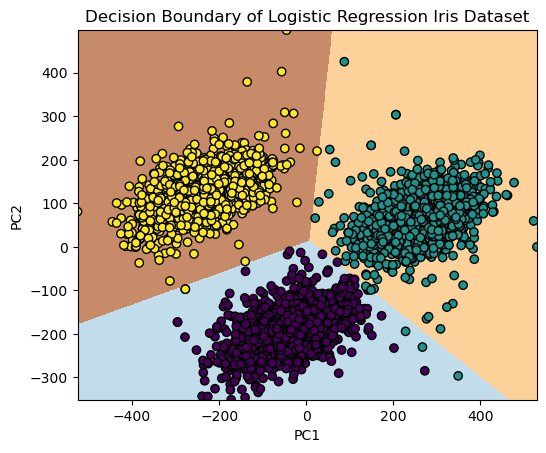

In [23]:
# TODO plot

plot_labels_and_decbdy(y, X, lr_model, 'Logistic Regression')

## 2 (Supervised) Suppor Vector Machine
### 2.1 Build SVM model
**Task:**
1. [3 pt] Use best() function to find the best SVM model.
    - For the pipeline, include a standard scaler.
    - For the grid, set kernel = ('rbf', 'sigmoid'), C = [1e-2, 1e-1, 1e0, 1e1, 1e2].
2. [1 pt] Print the best model.

In [24]:
# TODO SVM with pipeline

from sklearn.svm import SVC

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

svm_grid = {
    'classifier__kernel': ['rbf', 'sigmoid'],
    'classifier__C': [1e-2, 1e-1, 1e0, 1e1, 1e2]
}

svm_model = best(pipe_svm, svm_grid, X, y.ravel())

print(svm_model)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


### 2.2 Plot
**Task:**
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their true labels, and the decision boundary of the SVM model.

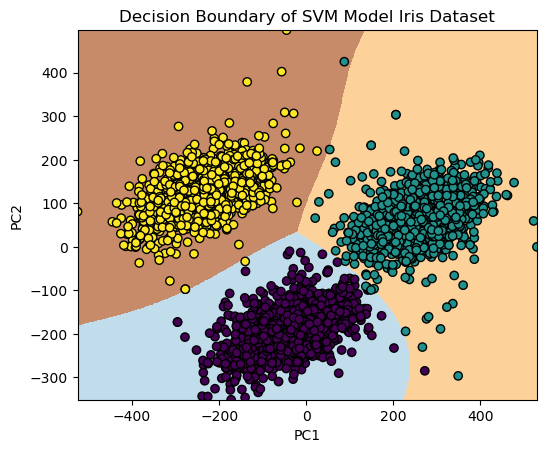

In [25]:
# TODO plot

plot_labels_and_decbdy(y, X, svm_model, 'SVM Model')


## 3 (Unsupervised) K means
### 3.1 Choose number of clusters via elbow plot
In the unsupervised setting, we do not have labels `y` anymore!

So, we need to identify how many clusters we want in the unsupervised model. Suppose we don't know a priori how many clusters there are likely to be. Here is one way to use kmeans to select the appropriate number of clusters.

**Task:**
1. Complete the code below in the for-loop.
    - [1 pt] Define `kmeans_mdl`. Set n_clusters = num_clusters, n_init=100, init='k-means++', random_state=0.
    - [1 pt] Fit kmeans_mdl to the data `X`.
2. [1 pt] Run the cell and produce the plot with appropriate axis labels. 
3. [1 pt] What does the plot suggest about the correct number of clusters we should be using? How did you come to your conclusion? Is that consistent with what you observed in the previous parts?
    
    **Ans:** The plot suggests that the correct number of clusters we should be using is 3, because any additional clusters being added does not significantly improve the inertia of the model. This is consistent with what we observed in the previous parts because we used three different labels in our previous supervised models and also our PCA projection showed that we should expect three clusters.
    

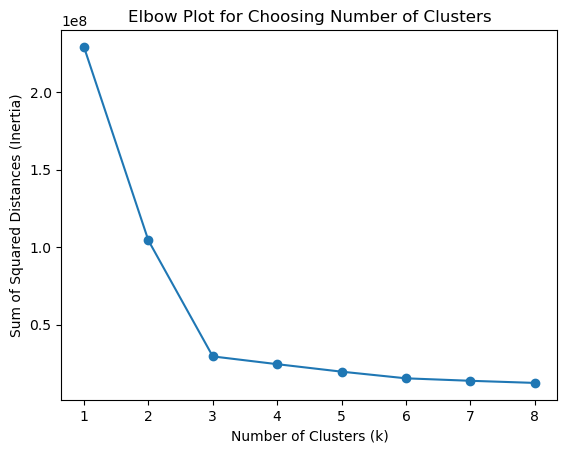

In [10]:
from sklearn.cluster import KMeans
n_clusters_to_check = 8
klist = np.arange(1,n_clusters_to_check+1)
slist = np.zeros(n_clusters_to_check)

for i in range(len(klist)):
    # TODO define k means and fit data
    k = klist[i]
    kmeans_mdl = KMeans(n_clusters=k, n_init=100, init='k-means++', random_state=0)
    kmeans_mdl.fit(X) 
    slist[i] = kmeans_mdl.inertia_

plt.plot(klist, slist, 'o-')
plt.xlabel('Number of Clusters (k)'); 
plt.ylabel('Sum of Squared Distances (Inertia)'); 
plt.title('Elbow Plot for Choosing Number of Clusters')
plt.show()

### 3.2 Build k means model
Use the number of clusters you identified in the previous part.
**Task:**
1. [1 pt] Define `km_model`, the KMeans object 
    -   Set init = 'k-means++', n_clusters to what you inferred in the previous part, n_init = 100, random_state = 0.
2. [1 pt] Fit the model to the projected data.
3. [1 pt] Predict the clusters and store them as `Cpred_km`.

In [13]:
# TODO define, fit, and predict k means
km_model = KMeans(init='k-means++', n_clusters=3, n_init=100, random_state=0)
km_model.fit(X)
Cpred_km = km_model.predict(X)

### 3.3 Plot
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their predicted labels, and the decision boundary of the k-means model.

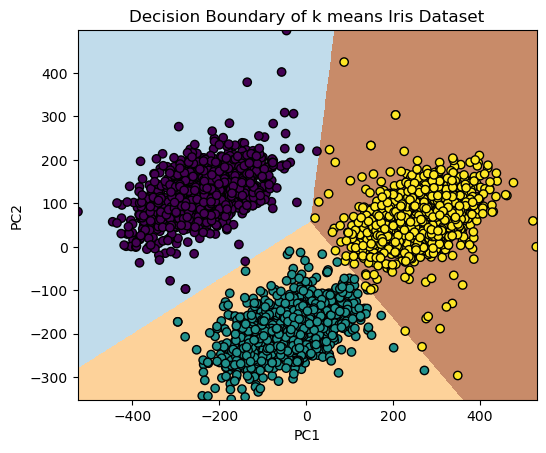

In [14]:
# TODO plot
plot_labels_and_decbdy(Cpred_km, X, km_model, 'k means')

## 4 (Unsupervised) Gaussian Mixture Models
### 4.1 Build GMM model

**Task:**
1. [1 pt] Define `gmm_model`, the GaussianMMixture object.
    - Set init n_components = 3.
2. [1 pt] Fit the model to the projected data.
3. [1 pt] Predict the clusters and store them as `Cpred_gmm`.

In [16]:
# TODO define, fit, and predict GMM

from sklearn.mixture import GaussianMixture


gmm_model = GaussianMixture(n_components=3)

gmm_model.fit(X)

Cpred_gmm = gmm_model.predict(X)

### 4.2 Plot
1. [1 pt] Use `plot_labels_and_decbdy` to plot the data points, their predicted labels, and the decision boundary of the GMM model.

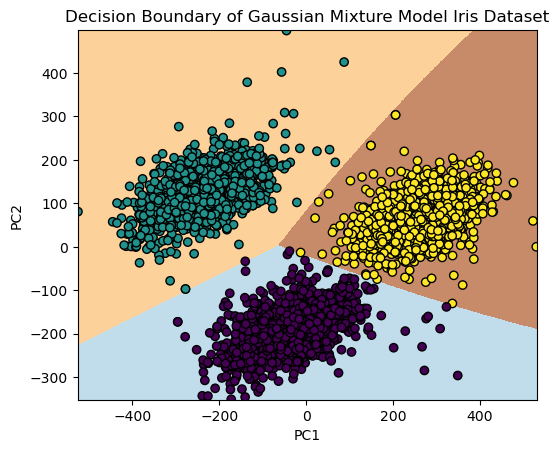

In [17]:
# TODO plot
plot_labels_and_decbdy(Cpred_gmm, X, gmm_model, 'Gaussian Mixture Model')


## 5 Discussion
1. [1 pt] What is a key difference between the process of **supervised learning** (logistic regression/SVM) and **unsupervised learning** (k-means/GMM)? Your response should be related to the (un)supervised-ness of the approaches. We are looking for evidence that you are reflecting on the paradigms of these approaches, a short response is enough.
    
    **Ans:** In supervised learning, we know the labels of our sample already, meaning we know the "correct" class that each inidvidual data point comes from. Selecting training/testing data is similar in both types of methods, but in the case of supervised learning, we can use our labels to find out the accuracy of our training model, whereas with unsupervised learning we cannot. (Note: in this case we actually can check our accuracy with the training model even in the unsupervised learning case because we have labels for our data. In the case where we didn't have any labels, we couldn't check accuracy.)

2. [1 pt] Compare the difference in shape of the decision boundaries between **logistic regression and support vector machines**. 

    **Ans:** The decision boundaries of logistic regression are straight lines whereas the SVM boundaries are not. This is because they use different kernels, where one is linear and one is not.

3. [1 pt] Compare the differences in shape of the decision boundaries between **k-means and gaussian mixture models**. 

    **Ans:** The decision boundaries of k-means are linear while the decision boundaries of gaussian mixture models are not exactly linear. This is because GMM uses the normal distribution and therefore does not guarantee linearity.